This is a notebook where i do an analysis using the data from the happiness report of 2019. I will try to find what the main criterias that makes a country happy.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-happiness-report-2019/world-happiness-report-2019.csv


In [2]:
data = pd.read_csv(os.path.join(dirname, filename))
# data = pd.read_csv('world-happiness-report-2019.csv')

Looking at the first column of the data to have an idea of what the data looks like


In [3]:
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Getting the information about the data set

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


The number of non null values are not the same for all the columns
This suggests that there are NaN in the dataset
Let's sum the number of NaN by column

In [5]:
data.isna().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

Using the forward filling method to replace the NaN.
Since the countries are ranked in the dataset then it is most likely
that the values missing are similar to the country ranked right above the one 
with the missing values.

In [6]:
filled_data = data.fillna(method = 'ffill')

filled_data.isna().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             0
Negative affect             0
Social support              0
Freedom                     0
Corruption                  0
Generosity                  0
Log of GDP\nper capita      0
Healthy life\nexpectancy    0
dtype: int64

Now that we don't have any more NaN, we can scatter plot
the six criterias used to rank the countries.

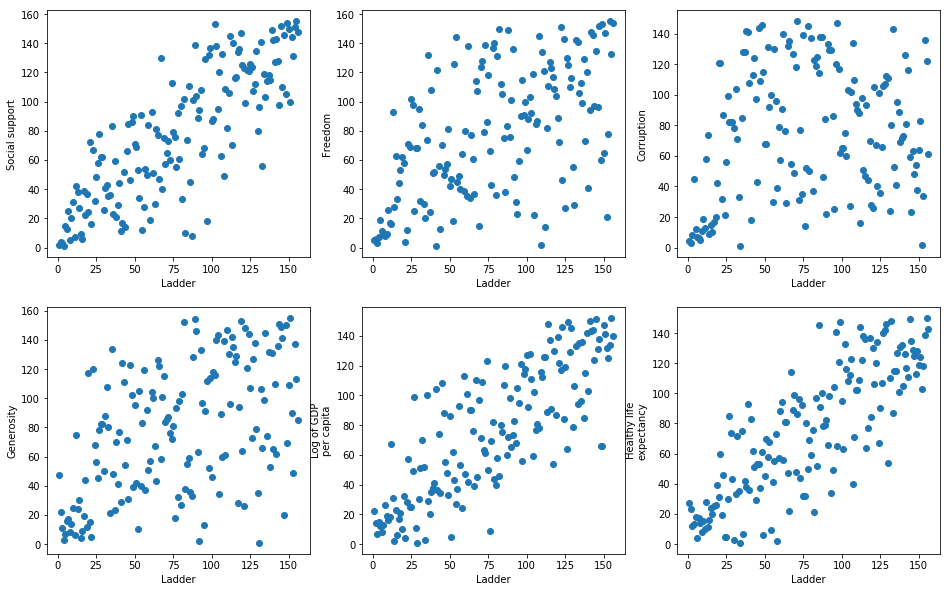

In [7]:
#Scatter plotting the six criterias used to assess happinness
criteria = filled_data.columns[5:11]

plt.figure(figsize=(16,10))
for i in range(criteria.shape[0]):
    plt.subplot(2,3,i+1)
    plt.scatter(x=filled_data['Ladder'],y=filled_data[criteria[i]])
    plt.xlabel('Ladder')
    plt.ylabel(criteria[i])

In the x axis we can just put the ranking of the country instead of
its name to make it easier. Then we can identify the country by its ranking (Ladder).

Another way to analyze the important factors is to get the ten top ranked, ten in the middle and ten at the bottom.
Then we can use the same scatter plot to see what factors are more important from those six.

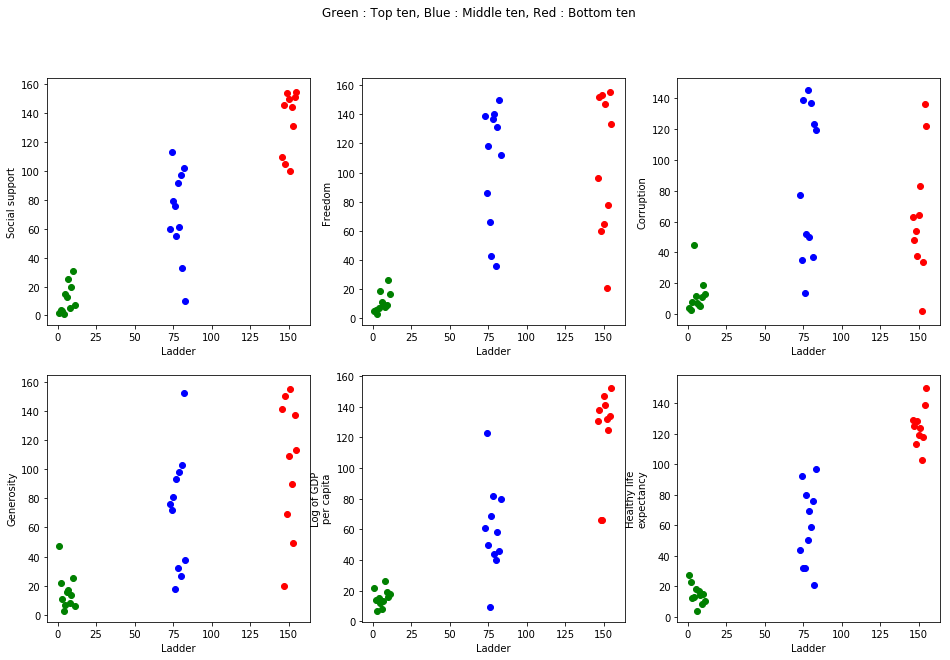

In [8]:
ten_best = filled_data[0:11]
ten_middle = filled_data[72:83]
ten_worst = filled_data[filled_data.shape[0]-11:-1]
plt.figure(figsize=(16,10))
for i in range(criteria.shape[0]):
    plt.subplot(2,3,i+1)
    plt.scatter(x=ten_best['Ladder'],y=ten_best[criteria[i]],c='green')
    plt.scatter(x=ten_middle['Ladder'],y=ten_middle[criteria[i]],c='blue')
    plt.scatter(x=ten_worst['Ladder'],y=ten_worst[criteria[i]],c='red')
    plt.xlabel('Ladder')
    plt.ylabel(criteria[i])
plt.suptitle("Green : Top ten, Blue : Middle ten, Red : Bottom ten");

This way of showing the data by getting ten countries from the top, middle and bottow allow to show what criterias need to put focus on to move to the top of the ranking.
If you compare the ten in the middle and the ten at the bottom, you can see that there is not a big difference in the Freedom, Corruption and Generosity. But, we can see a clear classification for the other three criterias. That basically translates to :
 - Are people healthy (Healthy life expentency) ?
 - Are they paid correctly (Log of GDP per capita) ?
 - Do they have acces to social services (Social Support)?

We can see how those three criterias are linkend by looking at the correlation

          Social       GDP    Health
Social  1.000000  0.761414  0.737000
GDP     0.761414  1.000000  0.842964
Health  0.737000  0.842964  1.000000


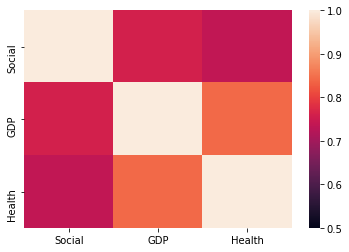

In [9]:
reduced_data = filled_data[['Social support', 
                'Log of GDP\nper capita', 
                'Healthy life\nexpectancy']]
reduced_data.columns = ['Social', 'GDP', 'Health'] # Reducing the name of the columns

corr = reduced_data.corr()
sns.heatmap(corr,vmin=0.5,vmax=1)

print(corr)

From the values of the correlation matrix then we can see how those three criterias are strongly correlated. 

So a person from a political party will look at those results and prepar a program based on those main criterias for the election. 

Feel free to let me know what you think !